In [66]:
import numpy as np
import pandas as pd

In [67]:
amplifiers = np.genfromtxt('amplifiers_0.csv',delimiter=',').astype(int)
print(amplifiers)
normals = 1-amplifiers
print(normals)

[0 1 1 1 0 1 0 1 0 0 0 1]
[1 0 0 0 1 0 1 0 1 1 1 0]


In [68]:
weights_biased = np.atleast_2d(np.genfromtxt('weights-biased_0.csv', delimiter=','))
weights_unbiased = np.atleast_2d(np.genfromtxt('weights-unbiased_0.csv', delimiter=','))
condorcet_biased = np.atleast_2d(np.genfromtxt('condorcet-biased_0.csv', delimiter=','))
unanimity_biased = np.atleast_2d(np.genfromtxt('unanimity_0.csv', delimiter=','))

In [69]:
n_experiments = 200

all_weights_ub_amp_means = []
all_weights_ub_namp_means = []

all_weights_amp_means = []
all_weights_namp_means = []
all_weights_ub_means = []
all_weights_ub_stds = []

all_condorcet_amp_means = []
all_condorcet_namp_means = []
all_condorcet_means = []
all_condorcet_stds = []

all_unanimity_amp_means = []
all_unanimity_namp_means = []

for i in range(n_experiments):
    amplifiers = np.genfromtxt('amplifiers_%d.csv' %i ,delimiter=',').astype(int)
    normals = 1-amplifiers
    if(sum(amplifiers) == 0 or sum(normals) == 0):
        continue
    
    weights_biased = np.atleast_2d(np.genfromtxt('weights-biased_%d.csv' % i, delimiter=','))
    #print("----- WEIGHTS ")
    #print("----- amplifiers")
    #print(weights_biased[:,amplifiers.astype(bool)])
    #print(weights_biased[:,amplifiers.astype(bool)].mean())
    all_weights_amp_means += [weights_biased[:,amplifiers.astype(bool)].mean()]
    
    #print("----- non amplifiers")
    #print(weights_biased[:,normals.astype(bool)])
    #print(weights_biased[:,normals.astype(bool)].mean())
    all_weights_namp_means += [weights_biased[:,normals.astype(bool)].mean()]
    
    weights_unbiased = np.atleast_2d(np.genfromtxt('weights-unbiased_%d.csv' % i, delimiter=','))
    all_weights_ub_amp_means += [weights_unbiased[:,amplifiers.astype(bool)].mean()]
    all_weights_ub_namp_means += [weights_unbiased[:,normals.astype(bool)].mean()]
    all_weights_ub_means += [weights_unbiased.mean()]
    all_weights_ub_stds += [weights_unbiased.std()]
    
    condorcet_biased = np.atleast_2d(np.genfromtxt('condorcet-biased_%d.csv' % i, delimiter=','))
    #print("----- CONDORCET ")
    #print("----- amplifiers")
    #print(condorcet_biased[:,amplifiers.astype(bool)])
    #print(condorcet_biased[:,amplifiers.astype(bool)].mean())
    all_condorcet_amp_means += [condorcet_biased[:,amplifiers.astype(bool)].mean()]
    
    #print("----- non amplifiers")
    #print(condorcet_biased[:,normals.astype(bool)])
    #print(condorcet_biased[:,normals.astype(bool)].mean())
    all_condorcet_namp_means += [condorcet_biased[:,normals.astype(bool)].mean()]
    all_condorcet_means += [condorcet_biased.mean()]
    all_condorcet_stds += [condorcet_biased.std()]
    
    unanimity_biased = np.atleast_2d(np.genfromtxt('unanimity_%d.csv' % i, delimiter=','))
    all_unanimity_amp_means += [unanimity_biased[:,amplifiers.astype(bool)].mean()]
    all_unanimity_namp_means += [unanimity_biased[:,normals.astype(bool)].mean()]

In [70]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'CMR10'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['figure.titlesize'] = 13
isseorange = (1.0, 0.57647, 0.039216)
#\definecolor{issegrey}{RGB}{80,85,82}
issegrey = (80.0 / 255, 85.0 / 255, 82.0 / 255)


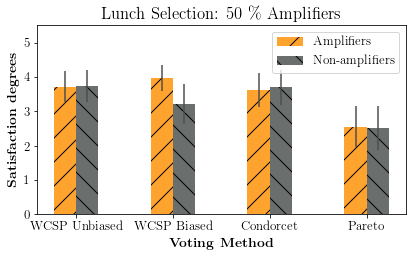

In [71]:
# Credit: Josh Hemann

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 4 # weighted and condorcet 
# within each group amplifiers and non-amplifiers correspond to men and women

all_weights_ub_amp_means = np.array(all_weights_ub_amp_means)
all_weights_ub_namp_means = np.array(all_weights_ub_namp_means)

all_weights_amp_means = np.array(all_weights_amp_means)
all_weights_namp_means = np.array(all_weights_namp_means)
all_weights_ub_means = np.array(all_weights_ub_means)
all_weights_ub_stds = np.array(all_weights_ub_stds)


all_condorcet_amp_means = np.array(all_condorcet_amp_means)
all_condorcet_namp_means = np.array(all_condorcet_namp_means)
all_condorcet_means = np.array(all_condorcet_means)
all_condorcet_stds = np.array(all_condorcet_stds)

all_unanimity_amp_means = np.array(all_unanimity_amp_means)
all_unanimity_namp_means = np.array(all_unanimity_namp_means)
    
means_amp = (all_weights_ub_amp_means.mean(), all_weights_amp_means.mean(), all_condorcet_amp_means.mean(), all_unanimity_amp_means.mean())
std_amp = (all_weights_ub_amp_means.std(), all_weights_amp_means.std(), all_condorcet_amp_means.std(), all_unanimity_amp_means.std())

means_namp = (all_weights_ub_namp_means.mean(), all_weights_namp_means.mean(), all_condorcet_namp_means.mean(), all_unanimity_namp_means.mean())
std_namp = (all_weights_ub_namp_means.std(), all_weights_namp_means.std(), all_condorcet_namp_means.std(), all_unanimity_namp_means.std())

fig, ax = plt.subplots()

column_width = 4.803 # in inches
fig_width = column_width * 1.25
fig_height = fig_width / 1.618

means_amp = np.array(means_amp)
means_namp = np.array(means_namp)


index = np.arange(n_groups)
bar_width = 0.23

opacity = 0.85
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_amp, bar_width,
                alpha=opacity, color=isseorange,hatch="/",
                yerr=std_amp, error_kw=error_config,
                label='Amplifiers')

rects2 = ax.bar(index + bar_width, means_namp, bar_width,
                alpha=opacity, color=issegrey,hatch="\\",
                yerr=std_namp, error_kw=error_config,
                label='Non-amplifiers')

ax.set_xlabel(r'\textbf{Voting Method}')
ax.set_ylabel(r'\textbf{Satisfaction degrees}')
ax.set_title('Lunch Selection: 50 \% Amplifiers')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('WCSP Unbiased', 'WCSP Biased', 'Condorcet', 'Pareto'))
plt.ylim([0,5.5])
ax.legend(loc=0)

fig.tight_layout()

fig.set_size_inches(fig_width, fig_height)
plt.savefig("lunch-selection-comparison-05.pdf")
plt.show()


In [72]:
print(np.array(all_weights_ub_stds).mean(), np.array(all_weights_ub_stds).std())

print(np.array(all_condorcet_stds).mean(), np.array(all_condorcet_stds).std())

1.1865991793355049 0.24282000384435592
1.1853970777150264 0.22823389886062032


(array([ 0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  3.,  1.,  4.,  8.,  3.,
         4., 11.,  2.,  6., 14.,  3.,  9., 18.,  7., 14.,  6., 16.,  2.,
        11.,  7., 10.,  3., 10.,  3.,  7.,  2.,  3.,  4.,  1.,  0.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]),
 array([0.5       , 0.53061224, 0.56122449, 0.59183673, 0.62244898,
        0.65306122, 0.68367347, 0.71428571, 0.74489796, 0.7755102 ,
        0.80612245, 0.83673469, 0.86734694, 0.89795918, 0.92857143,
        0.95918367, 0.98979592, 1.02040816, 1.05102041, 1.08163265,
        1.1122449 , 1.14285714, 1.17346939, 1.20408163, 1.23469388,
        1.26530612, 1.29591837, 1.32653061, 1.35714286, 1.3877551 ,
        1.41836735, 1.44897959, 1.47959184, 1.51020408, 1.54081633,
        1.57142857, 1.60204082, 1.63265306, 1.66326531, 1.69387755,
        1.7244898 , 1.75510204, 1.78571429, 1.81632653, 1.84693878,
        1.87755102, 1.90816327, 1.93877551, 1.96938776, 2.        ]),
 <a list of 49 Patch objects>)

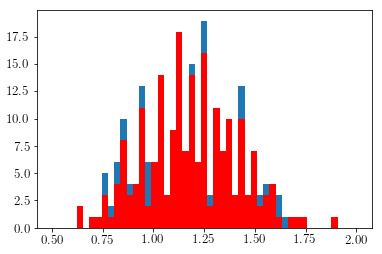

In [73]:

plt.hist(all_weights_ub_stds, bins=np.linspace(0.5,2, 50))

plt.hist(all_condorcet_stds, color='r', bins=np.linspace(0.5,2, 50))

In [74]:
# perform a quick normality test
from scipy import stats

k2, p = stats.shapiro(all_weights_ub_stds)
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("For weights, the null hypothesis can be rejected")
else:
    print("For weights, the null hypothesis cannot be rejected")


p = 0.215243
For weights, the null hypothesis cannot be rejected


In [75]:
# perform a quick normality test
from scipy import stats

k2, p = stats.shapiro(all_condorcet_stds)
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("For condorcet, the null hypothesis can be rejected")
else:
    print("For condorcet, the null hypothesis cannot be rejected")


p = 0.798026
For condorcet, the null hypothesis cannot be rejected


In [76]:


import scipy.stats as st

[t, prob] = st.ttest_ind(all_weights_ub_stds, all_condorcet_stds)
print(t, prob)
if prob < 0.05:
    print("SIGNIFICANT")
else:
    print("INSIGNIFICANT")

0.05088666707303944 0.9594413583482018
INSIGNIFICANT


In [77]:
print(np.round(all_weights_ub_stds.mean(), 2))
print(np.round(all_weights_ub_stds.std(), 2))


1.19
0.24


In [78]:
print(np.round(all_condorcet_stds.mean(), 2))
print(np.round(all_condorcet_stds.std(), 2))


1.19
0.23


In [79]:
print(np.round(all_weights_ub_means.mean(), 2))
print(np.round(all_weights_ub_means.std(), 2))

3.72
0.22


In [80]:
print(np.round(all_condorcet_means.mean(), 2))
print(np.round(all_condorcet_means.std(), 2))

3.64
0.28


In [81]:
# Compare weighted non-amplifiers and amplifiers
print(all_weights_amp_means.mean()) 
print(all_weights_namp_means.mean())

3.9753484848484852
3.203449855699856


In [91]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'CMR10'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 13
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['figure.titlesize'] = 12
isseorange = (1.0, 0.57647, 0.039216)
#\definecolor{issegrey}{RGB}{80,85,82}
issegrey = (80.0 / 255, 85.0 / 255, 82.0 / 255)


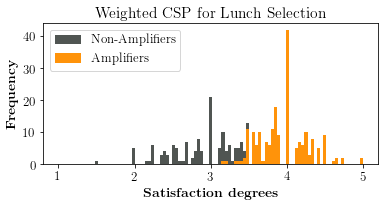

In [103]:
fig, ax = plt.subplots()
plt.hist(all_weights_namp_means, color=issegrey, bins=np.linspace(1,5, 100), label="Non-Amplifiers")
plt.hist(all_weights_amp_means, color=isseorange, bins=np.linspace(1,5, 100), label="Amplifiers")
ax.set_xlabel(r'\textbf{Satisfaction degrees}')
ax.set_ylabel(r'\textbf{Frequency}')
ax.set_title('Weighted CSP for Lunch Selection')
plt.legend()

fig.set_size_inches(fig_width, fig_height*0.7)
#fig.tight_layout()
plt.savefig("lunch-selection-weights.pdf",  bbox_inches='tight')
plt.show()

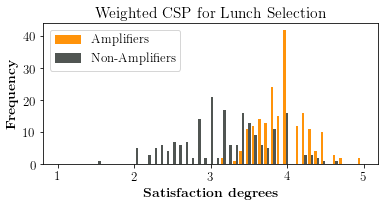

In [115]:
X = np.array([all_weights_amp_means,all_weights_namp_means]).T
fig, ax = plt.subplots()

plt.hist(X , color=(isseorange,issegrey), bins=np.linspace(1,5, 50), label=("Amplifiers","Non-Amplifiers"))

#plt.hist(all_weights_namp_means, color=issegrey, bins=np.linspace(1,5, 100), label="Non-Amplifiers")
#plt.hist(all_weights_amp_means, color=isseorange, bins=np.linspace(1,5, 100), label="Amplifiers")
ax.set_xlabel(r'\textbf{Satisfaction degrees}')
ax.set_ylabel(r'\textbf{Frequency}')
ax.set_title('Weighted CSP for Lunch Selection')
plt.legend()

fig.set_size_inches(fig_width, fig_height*0.7)
#fig.tight_layout()
plt.savefig("lunch-selection-weights.pdf",  bbox_inches='tight')
plt.show()

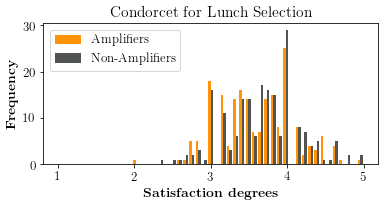

In [114]:
X = np.array([all_condorcet_amp_means, all_condorcet_namp_means]).T
fig, ax = plt.subplots()
plt.hist(X , color=(isseorange,issegrey), bins=np.linspace(1,5, 50), label=("Amplifiers","Non-Amplifiers"))

ax.set_xlabel(r'\textbf{Satisfaction degrees}')
ax.set_ylabel(r'\textbf{Frequency}')
ax.set_title('Condorcet for Lunch Selection')
plt.legend()
fig.set_size_inches(fig_width, fig_height*0.7)

plt.savefig("lunch-selection-condorcet.pdf", bbox_inches='tight')

plt.show()

In [119]:
# testing amp vs non amp in  weights and condorcets
import scipy.stats as st

[t, prob] = st.ttest_ind(all_condorcet_amp_means, all_unanimity_amp_means)
print(t, prob)
print("For Condorcet: ")
if prob < 0.01:
    print("SIGNIFICANT")
else:
    print("INSIGNIFICANT")   

[t, prob] = st.ttest_ind(all_condorcet_namp_means, all_unanimity_namp_means)
print(t, prob)
print("For Weights: ")
if prob < 0.01:
    print("SIGNIFICANT")
else:
    print("INSIGNIFICANT")


19.40209455857162 1.679780962977944e-59
For Condorcet: 
SIGNIFICANT
20.625203781379568 8.21096242387169e-65
For Weights: 
SIGNIFICANT


In [116]:
# testing Pareto vs Condorcet